In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('House-Price.csv' , header=0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
Sold           506 non-null int64
dtypes: float64(14), int64(2), object(3)
memory usage: 75.2+ KB


In [3]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


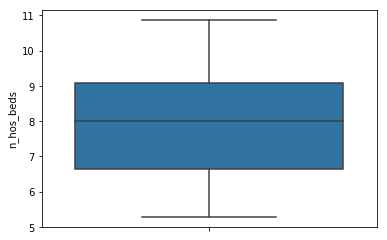

In [4]:
sns.boxplot(y="n_hos_beds", data=df)

In [5]:
?sns.boxplot

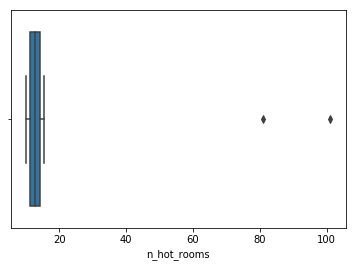

In [6]:
sns.boxplot(x="n_hot_rooms", data=df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


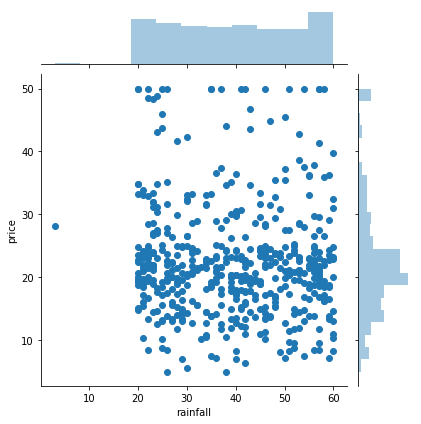

In [7]:
sns.jointplot(x="rainfall", y= "price" , data=df)

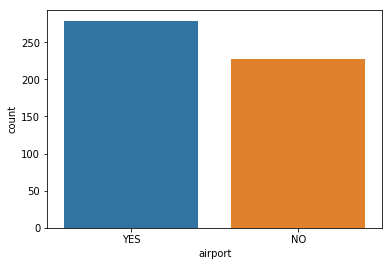

In [8]:
sns.countplot(x="airport" , data = df)

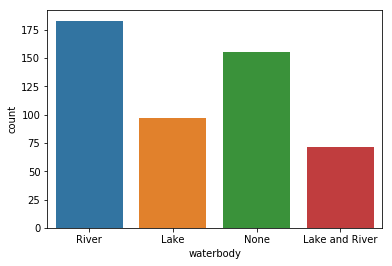

In [9]:
sns.countplot(x="waterbody" , data = df)

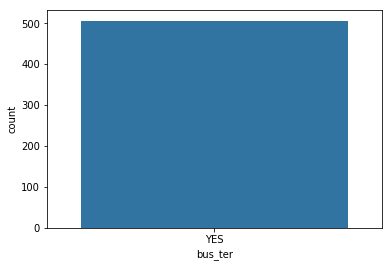

In [10]:
sns.countplot(x="bus_ter",data=df)

### Outlier Treatment using numpy

In [11]:
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [12]:
np.percentile(df.n_hot_rooms,[99])[0] #to remove the array in upper result array([15.39952])

15.399519999999999

In [13]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [14]:
df[(df.n_hot_rooms) > uv]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [15]:
df.n_hot_rooms[(df.n_hot_rooms) > 3*uv] = 3*uv

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
np.percentile(df.rainfall,[1])[0] # rainfall outlier is at lower end so we are using 1st percentile

20.0

In [17]:
lv = np.percentile(df.rainfall,[1])[0]

In [18]:
df[df.rainfall < lv]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019,1


In [19]:
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000


### missing Value impudation

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
Sold           506 non-null int64
dtypes: float64(14), int64(2), object(3)
memory usage: 75.2+ KB


In [22]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     506 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
Sold           506 non-null int64
dtypes: float64(14), int64(2), object(3)
memory usage: 75.2+ KB


### Variable Transformation and Deletion

In [24]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [25]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545,3.795104
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,0.498422,2.105859
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000,1.127500
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,1.000000,5.187500
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000,12.127500


In [26]:
del df['dist1']


In [27]:
del df['dist2']

In [28]:
del df['dist3']

In [30]:
del df['dist4']

KeyError: 'dist4'

In [ ]:
df.describe()

In [ ]:
del df['bus_ter']

In [31]:
df = pd.get_dummies(df)

In [32]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,bus_ter_YES
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,0,1,0,0,0,1,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,1,0,1,0,0,0,1
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,1,0,0,0,1,0,1
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,0,1,1,0,0,0,1
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,1,0,1,0,0,0,1


In [33]:
del df['airport_NO']

In [34]:
del df['waterbody_None']

In [35]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0,1
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0,1
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0,1
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0,1


### Logistic Regression

In [36]:
Y = df['Sold']
X = df[['price']]

In [37]:
X.head()
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Sold, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf_lrs = LogisticRegression()

In [41]:
clf_lrs.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
clf_lrs.coef_

array([[-0.03432813]])

In [43]:
clf_lrs.intercept_

array([0.57938254])

In [44]:
import statsmodels.api as sn
X_cons = sn.add_constant(X)
X_cons.head()

,const,price
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2


In [46]:
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(Y,X_cons).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 May 2021   Pseudo R-squ.:                 0.01788
Time:                        10:22:43   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
                                        LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

### Multi_variant

In [47]:
Independent_vars = df.loc[:,df.columns!='Sold']  #B1,b2....bn
Dependent_var = df['Sold']
Logis_cl = LogisticRegression()
Logis_cl.fit(Independent_vars,Dependent_var)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
Logis_cl.coef_  #Beta values like B1,B2,B3....Bn

array([[-0.25190969, -0.00765251, -1.18592405,  0.89030258, -0.00468309,
         0.25325067, -0.21161742,  0.16812453, -0.08466905, -0.00600986,
        -0.05266996, -0.33803057, -0.12047081, -0.06680524, -0.02138607,
         0.2042382 , -0.21154484]])

In [52]:
Logis_cl.intercept_  #Beta-0 value

array([-0.21154484])

In [53]:
Const_value = sn.add_constant(Independent_vars)

In [54]:
Logistic_regression_multi = sm.Logit(Dependent_var,Const_value).fit()

Optimization terminated successfully.
         Current function value: 0.556433
         Iterations 6


In [55]:
Logistic_regression_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           16
Date:                Tue, 04 May 2021   Pseudo R-squ.:                  0.1924
Time:                        10:22:49   Log-Likelihood:                -281.56
converged:                       True   LL-Null:                       -348.64
                                        LLR p-value:                 9.930e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
price                       -0.2741      0.033     -8.313      0.000      -0.339      -0.209
resid_area                   0.0192      0.027      0.720      0.471      -0.033       0.071
air_qual                    -7.4183      2.691     -2.757      0.006     -12.693      -2.144
room_num                     1.1067      0.277      4.001      0.000       0.565       1.649
age                         -0.0020      0.007     -0.302      0.762      -0.015       0.011
teachers                     0.3150      0.064      4.937      0.000       0.190       0.440
poor_prop                   -0.2077      0.034     -6.149      0.000      -0.274      -0.141
n_hos_beds                   0.1760      0.071      2.467      0.014       0.036       0.316
n_hot_rooms                 -0.0742      0.052     -1.439      0.150      -0.175       0.027
rainfall                    -0.0033      0.008     -0.394      0.693      -0.020       0.013
parks                       29.1089     24.177      1.204      0.229     -18.277      76.495
avg_dist                    -0.4017      0.098     -4.118      0.000      -0.593      -0.211
airport_YES                 -0.1524      0.211     -0.723      0.469      -0.565       0.261
waterbody_Lake              -0.1032      0.304     -0.340      0.734      -0.698       0.492
waterbody_Lake and River    -0.0626      0.328     -0.191      0.849      -0.705       0.580
waterbody_River              0.2394      0.256      0.937      0.349      -0.262       0.740
bus_ter_YES                 -2.1383      2.649     -0.807      0.420      -7.331       3.054
============================================================================================
"""

### Creating confusion matrix

In [56]:
y_pre = Logis_cl.predict(Independent_vars)


In [60]:
y_pre_03 = (Logis_cl.predict_proba(Independent_vars)[:,1]>=0.3)

In [61]:
y_pre_03

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,

In [62]:
from sklearn.metrics import confusion_matrix


In [63]:
confusion_matrix(Dependent_var,y_pre)

array([[195,  81],
       [ 77, 153]], dtype=int64)

In [64]:
confusion_matrix(Dependent_var,y_pre_03)

array([[122, 154],
       [ 17, 213]], dtype=int64)

### Performance measure calculation

In [66]:
clf_lrs.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
from sklearn.metrics import precision_score, recall_score,roc_auc_score

In [69]:
precision_score(Dependent_var,y_pre)

0.6538461538461539

In [70]:
recall_score(Dependent_var,y_pre)

0.6652173913043479

In [71]:
roc_auc_score(Dependent_var,y_pre)

0.6858695652173914

### Linear Discriminant Analysis

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [74]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(Independent_vars,Dependent_var)
y_pre_lda = clf_lda.predict(Independent_vars)
confusion_matrix(Dependent_var,y_pre_lda)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([[192,  84],
       [ 79, 151]], dtype=int64)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
Independent_train ,Independent_test,Dependent_train,Dependent_test = train_test_split(Independent_vars,Dependent_var,test_size=0.2,random_state=0)

In [77]:
print(Independent_train.shape ,Independent_test.shape,Dependent_train.shape,Dependent_test.shape)

(404, 17) (102, 17) (404,) (102,)


In [78]:
clf_LR =LogisticRegression()
clf_LR.fit(Independent_train,Dependent_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
Independent_test_pred = clf_LR.predict(Independent_test)

In [80]:
from sklearn.metrics import accuracy_score
confusion_matrix(Dependent_test,Independent_test_pred)

array([[36, 22],
       [13, 31]], dtype=int64)

In [81]:
accuracy_score(Dependent_test,Independent_test_pred)

0.6568627450980392

### K-nearest Neighbors

In [82]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Independent_train)
Independent_train_s = scaler.transform(Independent_train)


In [83]:
scaler = preprocessing.StandardScaler().fit(Independent_test)
Independent_test_s = scaler.transform(Independent_test)


In [85]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(Independent_train_s,Dependent_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [86]:
confusion_matrix(Dependent_test,clf_knn_1.predict(Independent_test_s))


array([[30, 28],
       [19, 25]], dtype=int64)

In [87]:
accuracy_score(Dependent_test,clf_knn_1.predict(Independent_test_s))

0.5392156862745098